In [37]:
!pip install keras

from tensorflow import keras
import keras
from keras import layers
from keras.datasets import mnist

(x_train, y_train),(x_test, y_test)  =mnist.load_data()

#The MNIST dataset consists of a set of 28x28 grayscale images
# of handwritten digits (0 to 9) along with their corresponding labels.

In [38]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [39]:
x_train, x_test = x_train/255.0, x_test/255.0             # 0-1の値にしてるのかな。
model = keras.models.Sequential()                         # Sequentialとは？他にあるのでは？　skipとかかな
model.add(layers.Flatten(input_shape = (28,28)))          # flatten  & Dense の２つがある
model.add(layers.Dense(128, activation ="relu"))
model.add(layers.Dense(10, activation ="softmax"))
model.compile(optimizer = "adam",                         # compile とは？そして、optimizerのadamとは？
              loss= "sparse_categorical_crossentropy",      #おそらく損失関数のタイプがあって、クロスエントロピーを利用しているのかと。
              metrics =['accuracy'])                        #評価関連？
model.fit(x_train, y_train, epochs =5, validation_data=(x_test,y_test))                       # epochs=5 ?






predict = model.predict(x_test)

Epoch 1/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2577 - accuracy: 0.9264 - val_loss: 0.1371 - val_accuracy: 0.9607
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1120 - accuracy: 0.9666 - val_loss: 0.0940 - val_accuracy: 0.9727
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0773 - accuracy: 0.9773 - val_loss: 0.0821 - val_accuracy: 0.9736
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0573 - accuracy: 0.9823 - val_loss: 0.0857 - val_accuracy: 0.9736
Epoch 5/5
313/313 [==============================] - 1s 2ms/step


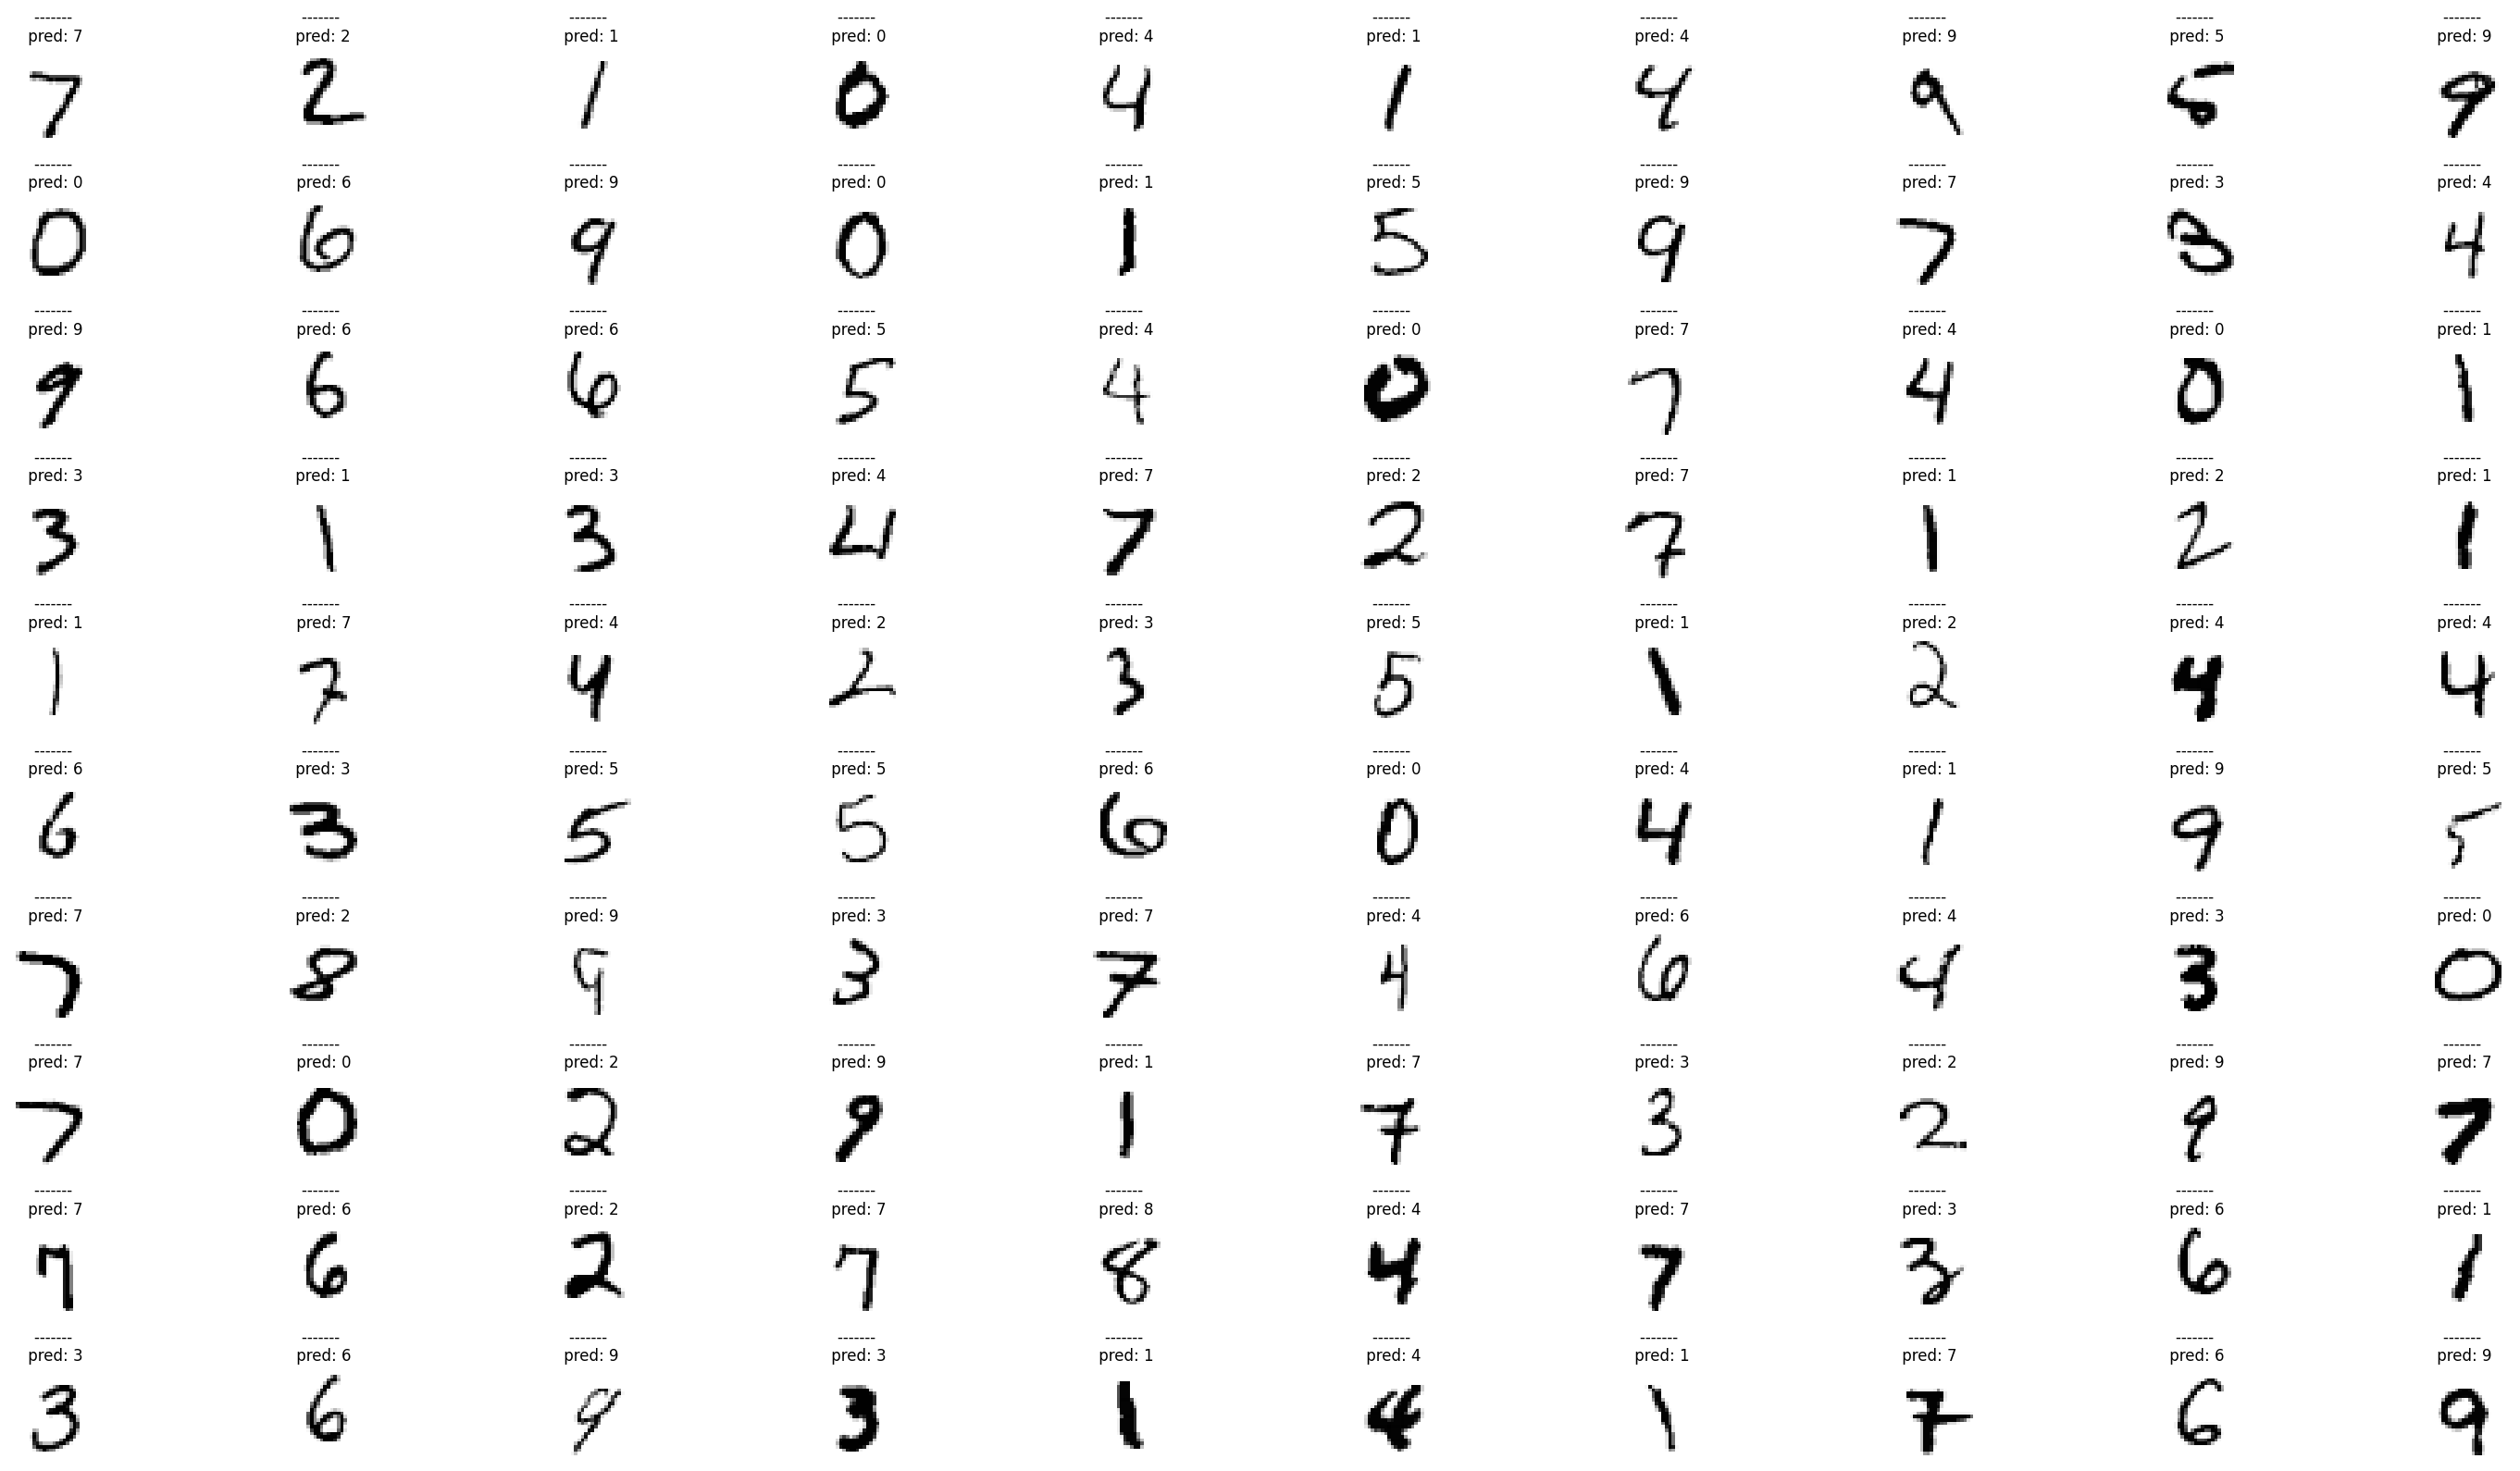

In [64]:
import matplotlib.pyplot as plt
import numpy as np


num_rows = 10
num_columns = 10
num_images_to_display = num_rows * num_columns

selected_images = x_test[:num_images_to_display]    #
selected_labels = x_test[:num_images_to_display]      #labels
selected_prediction = predict[:num_images_to_display] #prediction
# print(type(selected_images[0]))
# print(type(selected_labels[0]), selected_labels[0])
# print(type(selected_prediction[0]))

# print(selected_prediction[0])
# print(selected_prediction[1])
# print(np.argmax(selected_prediction[0]))
# print(np.argmax(selected_prediction[1]))

# Plot the selected images
plt.figure(figsize=(30, 16))
for i in range(num_images_to_display):
    plt.subplot(num_rows, num_columns, i + 1)
    plt.imshow(selected_images[i], cmap='Greys')
    plt.title(f"------- \n pred: {np.argmax(selected_prediction[i])} ")
    plt.axis('off')

plt.tight_layout()
plt.show()


# plt.imshow(x_test[0], cmap="Greys")
# plt.show()